In [544]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns


In [545]:
LOW_QUANTILE = 0.2
HIGH_QUANTILE = 0.201

# Create a Folder to Store the Results
import os

if not os.path.exists("Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE)):
    os.mkdir("Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE))
    
save_path = "Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE) + "/"

## Data

### mRNA Expression Data

In [546]:
mRNA_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Melanoma mRNA.csv")
mRNA_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [547]:
full_mRNA_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Pancancer mRNA.csv")
full_mRNA_df.drop(['Unnamed: 0'], axis=1, inplace=True)

### Gene Dependency Data

In [548]:
dependency_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Melanoma Gene Dependency.csv")
dependency_df.drop(['Unnamed: 0'], axis=1, inplace=True)



### Cell Lines Data

In [549]:
cell_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Melanoma Cells.csv")
cell_df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(cell_df.shape)

(41, 8)


### Chromatin Modifying Genes

In [550]:
chromatin_genes_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Chromatin Genes.csv")
chromatin_genes_df.head(5)

,Gene
0,ACTB
1,ACTL6A
2,ACTL6B
3,AKAP8
4,AKAP8L


## Analysis

### Validating Assumptions / mRNA Quartiles

#### Normality Test (Shapiro-Wilk Test) for mRNA Expression and Gene Dependency

In [551]:
# Shapiro-Wilk Test for Normality for All Genes in Gene mRNA Expression Data
# Interpretation: p-value < 0.05, therefore  mRNA data is not normally distributed
results = []
for gene in mRNA_df.columns[1:]:
    results.append((gene,stats.shapiro(mRNA_df[gene])[0],stats.shapiro(mRNA_df[gene])[1]))
    
shapiro_df = pd.DataFrame(results, columns=['Gene','W-Stat','p-value'])
print(shapiro_df.shape)
print(mRNA_df.shape)
print('number of genes that are normally distributed: ', len(shapiro_df[shapiro_df['p-value'] > 0.05]))
    

c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


(19193, 3)
(41, 19194)
number of genes that are normally distributed:  8504


#### mRNA Quartiles (Pancancer mRNA & Melanoma mRNA)

##### Chromatin mRNA Subset

In [552]:
mRNA_genes = mRNA_df.columns[1:].tolist()
chromatin_genes = chromatin_genes_df['Gene'].tolist()
intersection = list(set(chromatin_genes).intersection(mRNA_genes))

chromatin_vip_df = mRNA_df[intersection]

print(chromatin_vip_df.shape)
print(len(chromatin_genes))

chromatin_genes_quantiles = chromatin_vip_df.quantile([LOW_QUANTILE, HIGH_QUANTILE])

# Save
chromatin_genes_quantiles.to_csv(save_path + 'Chromatin Genes Quantiles.csv')

chromatin_genes_quantiles.head(5)

(41, 497)
499


,KDM5B,BRD4,RCOR2,RLF,RING1,TNP2,SMARCA1,SETMAR,PAF1,ASF1B,...,BRPF1,LEF1,ARID1A,HR,SNW1,HMGB2,HLTF,SMARCA2,TADA2B,CTBP1
0.200,3.555816,4.183487,0.189034,2.451541,4.817112,0.0,3.451541,2.678072,4.769772,4.803744,...,2.908813,5.280214,4.157852,1.232661,5.732541,6.894090,4.241840,4.336283,2.720278,5.317955
0.201,3.558501,4.184432,0.189538,2.452793,4.818347,0.0,3.451909,2.682830,4.770778,4.805333,...,2.913177,5.291848,4.158463,1.232906,5.732822,6.902374,4.242898,4.336426,2.725146,5.323034


In [553]:
full_mRNA_genes = full_mRNA_df.columns[1:].tolist()
chromatin_genes = chromatin_genes_df['Gene'].tolist()
intersection = list(set(chromatin_genes).intersection(full_mRNA_genes))

chromatin_vip_df = full_mRNA_df[intersection]

print(chromatin_vip_df.shape)
print(len(chromatin_genes))

full_chromatin_genes_quantiles = chromatin_vip_df.quantile([LOW_QUANTILE, HIGH_QUANTILE])

# Save
full_chromatin_genes_quantiles.to_csv(save_path + 'Chromatin Genes Quantiles.csv')

full_chromatin_genes_quantiles.head(5)

(1407, 497)
499


,KDM5B,BRD4,RCOR2,RLF,RING1,TNP2,SMARCA1,SETMAR,PAF1,ASF1B,...,BRPF1,LEF1,ARID1A,HR,SNW1,HMGB2,HLTF,SMARCA2,TADA2B,CTBP1
0.200,3.459168,3.881665,0.347092,2.395063,4.652716,0.0,0.672634,2.572890,4.952893,4.696328,...,3.060047,0.250962,4.032453,0.15056,5.635928,7.222128,3.721591,3.745021,2.674460,5.731455
0.201,3.464945,3.883442,0.356144,2.395063,4.653633,0.0,0.692474,2.577287,4.953265,4.700018,...,3.061095,0.258278,4.035463,0.15056,5.637152,7.223425,3.725771,3.752356,2.678072,5.735659


### T-Tests Between mRNA Quartiles

#### Chromatin mRNA Quartile T-Tests

In [554]:
results = []
chromatin_gene_groups = pd.DataFrame()

for gene in intersection:
    # Index by gene column and then quantile row index
    low_expression = full_chromatin_genes_quantiles[gene][LOW_QUANTILE]
    
    # Testing for > 25th percentile or < 75th percentile
    high_expression = full_chromatin_genes_quantiles[gene][HIGH_QUANTILE]
    
    # Create a filter and then index by the gene column
    low_expression_cells = mRNA_df[mRNA_df[gene] <= low_expression][['Cell Line',gene]]
    high_expression_cells = mRNA_df[mRNA_df[gene] > high_expression][['Cell Line',gene]]
    
    # T-Test of Gene mRNA Levels in Low and High Expression Cells
    ttest = stats.ranksums(low_expression_cells[gene], high_expression_cells[gene],  alternative = 'two-sided')
    
    # Append the results to the results list
    # Format: (Gene, Low Samples, Low Expression Mean, High Samples High Expression Mean, T-Stat, P-Value)
    results.append((gene, len(low_expression_cells), low_expression_cells[gene].mean(), len(high_expression_cells), high_expression_cells[gene].mean(), ttest[0], ttest[1]))
    
    # Add a column to the low expression cells called "Group" and assign it the value "low"
    low_expression_cells['Group'] = 'low'
    high_expression_cells['Group'] = 'high'
    
    # Sort the cells by cell line so that they are in the same order as the gene_groups dataframe
    expression = pd.concat([low_expression_cells, high_expression_cells])
    expression.sort_values(by=['Cell Line'], inplace=True)
    
    # Append the low and high expression cells to the gene_groups list
    chromatin_gene_groups = pd.concat([chromatin_gene_groups, expression['Group']], axis=1)
    chromatin_gene_groups.rename(columns={'Group': gene}, inplace=True)
    
    
    
chromatin_ttest_df = pd.DataFrame(results, columns=['Gene','Low Samples','Low Expression Mean','High Samples','High Expression Mean','T-Stat','P-Value'])
print(chromatin_ttest_df.shape)
print("Number of Genes with Significant Difference in Expression: ", len(chromatin_ttest_df[chromatin_ttest_df['P-Value'] < 0.05]))
chromatin_ttest_df.sort_values(by=['Gene'], inplace=True)
chromatin_ttest_df.reset_index(inplace=True, drop=True)
chromatin_ttest_df.head(5)
    


c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:8180: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:8180: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:8180: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:8180: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:8180: RuntimeWarning: invalid valu

(497, 7)
Number of Genes with Significant Difference in Expression:  452


,Gene,Low Samples,Low Expression Mean,High Samples,High Expression Mean,T-Stat,P-Value
0,ACTB,5,10.052939,36,11.429489,-3.585686,3.361935e-04
1,ACTL6A,4,6.015171,37,6.665922,-3.251373,1.148489e-03
2,ACTL6B,24,0.000000,17,0.075306,-5.398412,6.723316e-08
3,AKAP8,9,3.283049,32,4.282318,-4.535574,5.744712e-06
4,AKAP8L,9,4.499258,32,5.137791,-4.535574,5.744712e-06


In [555]:
# Write to CSV
chromatin_ttest_df.sort_values(by=['Low Samples','High Samples'], ascending=[False,True], inplace=True)
chromatin_ttest_df.reset_index(drop=True, inplace=True)
chromatin_ttest_df.to_csv(save_path + 'M mRNA T-Test Results( less ' + str(LOW_QUANTILE) + ' greater ' + str(HIGH_QUANTILE) + ' ).csv')

### T-Tests for Chronos Scores by mRNA Groups

#### Optional Filter

In [556]:
FILTERED = 1

# Filter the groups by ones with both low and high sample sizes > 10
chromatin_ttest_df_genes_filter = chromatin_ttest_df[(chromatin_ttest_df['Low Samples'] > 2) & (chromatin_ttest_df['High Samples'] > 2)]

# Retrieve the Genes
chromatin_ttest_df_genes_filter = chromatin_ttest_df_genes_filter ['Gene']

# Filter the gene groups by the filtered genes
chromatin_gene_groups_filtered = chromatin_gene_groups[chromatin_ttest_df_genes_filter]

# VALIDATION OF GENE GROUPS LOW SAMPLES KNOCKOUT
"""validated = []
for gene in chromatin_gene_groups_filtered.columns:
    # Cell Lines
    low_expression_genes = chromatin_gene_groups[gene][chromatin_gene_groups[gene] == 'low']
    
    # Filter the dependency dataframe by the cell lines
    low_expression_dependency = dependency_df.iloc[low_expression_genes.index]
    
    # Print the Mean Dependency Score
    print(gene, 'Low Expression Dependency Score Mean: ', low_expression_dependency[gene].mean())
    
    if low_expression_dependency[gene].mean() <= .1:
        validated.append(gene)
    else:
        continue
    
print('Number of Validated Genes: ', len(validated))
chromatin_gene_groups_filtered = chromatin_gene_groups_filtered[validated]"""
    

    
    




"validated = []\nfor gene in chromatin_gene_groups_filtered.columns:\n    # Cell Lines\n    low_expression_genes = chromatin_gene_groups[gene][chromatin_gene_groups[gene] == 'low']\n    \n    # Filter the dependency dataframe by the cell lines\n    low_expression_dependency = dependency_df.iloc[low_expression_genes.index]\n    \n    # Print the Mean Dependency Score\n    print(gene, 'Low Expression Dependency Score Mean: ', low_expression_dependency[gene].mean())\n    \n    if low_expression_dependency[gene].mean() <= .1:\n        validated.append(gene)\n    else:\n        continue\n    \nprint('Number of Validated Genes: ', len(validated))\nchromatin_gene_groups_filtered = chromatin_gene_groups_filtered[validated]"

#### T-Tests

In [557]:
if FILTERED:
    print('Filtered')
    chromatin_gene_groups = chromatin_gene_groups_filtered
    
gene_groups = chromatin_gene_groups

gene_groups = gene_groups.reindex(sorted(gene_groups.columns), axis=1)
print(gene_groups.shape)
gene_groups.head(5)

Filtered
(41, 421)


,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APLNR,ARID1A,ARID1B,ARID2,...,XBP1,YEATS2,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZZZ3
0,high,high,low,high,high,high,high,high,high,high,...,high,high,high,high,high,high,low,high,high,high
1,high,high,low,high,high,high,high,high,high,high,...,low,high,high,high,high,high,low,high,high,high
2,high,high,high,high,high,high,high,high,high,high,...,low,high,high,high,low,high,low,high,high,low
3,high,high,high,high,low,high,low,high,high,low,...,high,high,high,low,high,high,low,low,low,low
4,high,high,high,high,high,low,high,high,high,low,...,high,high,low,low,high,high,high,high,high,high


In [558]:
# Concatenate the vip genes dataframes
vip_genes = pd.Series(list(gene_groups.columns))
vip_genes.sort_values(inplace=True)
vip_genes.reset_index(drop=True, inplace=True)
print(vip_genes.shape)
vip_genes.head(5)

(421,)


0      ACTB
1    ACTL6A
2    ACTL6B
3     AKAP8
4    AKAP8L
dtype: object

##### Two-Sided T-Test

In [559]:
 # Create a Matrix of Gene x Gene
gene_effect_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1]))
gene_diff_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1]))
benjahimini_hochberg_correction = []
print(gene_effect_matrix.shape)

# Iterate through the genes
# For each gene, grab the low and high expression cell lines from the gene_groups dataframe
# Iterate through the other expression cell lines and then grab the gene dependency values
# from depdenency_df, index by the index of the cell line
for gene in vip_genes:
    low_expression = gene_groups[gene_groups[gene] == 'low'].index
    high_expression = gene_groups[gene_groups[gene] == 'high'].index
    
    for gene2 in vip_genes:
        low_expression_dependency = dependency_df.loc[low_expression, gene2]
        high_expression_dependency = dependency_df.loc[high_expression, gene2]
        
        # T-Test of Gene Dependency in Low and High Expression Cells
        ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'two-sided')
        
        # Difference in Gene Dependency in Low and High Expression Cells
        gene_diff_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = np.mean(low_expression_dependency) - np.mean(high_expression_dependency)
        
        # Add the t-statistic to the gene effect matrix
        gene_effect_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[1]
        
        # Add the p-value to the benjamini hochberg correction list and index for the gene effect matrix
        benjahimini_hochberg_correction.append([ttest[1], gene, gene2]) 

# Sort the benjamini hochberg correction list by p-value
benjahimini_hochberg_correction.sort(key=lambda x: x[0])

# Iterate through the benjamini hochberg correction list and apply the correction
for i in range(len(benjahimini_hochberg_correction)):
    benjahimini_hochberg_correction[i][0] = (benjahimini_hochberg_correction[i][0] * len(benjahimini_hochberg_correction)) / (i + 1)
    
        
        
        
# Save
np.savetxt(save_path + 'mRNA vs. Gene Dependency Matrix.csv', gene_effect_matrix, delimiter=",")
np.savetxt(save_path + 'Low vs. High Difference Matrix.csv', gene_diff_matrix, delimiter=",")

(421, 421)


C:\Users\commo\AppData\Local\Temp\ipykernel_12636\321384186.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'two-sided')


In [560]:
print(len(benjahimini_hochberg_correction))

177241


In [561]:
benjahimini_hochberg_correction

[[0.07393632240543191, 'ACTL6A', 'BPTF'],
 [0.46285400153870154, 'ACTB', 'ACTL6A'],
 [0.6032619352728001, 'CENPA', 'HMGB2'],
 [2.6587958368826703, 'BAZ1B', 'MSL3'],
 [2.958548807605183, 'ACTB', 'HCFC1'],
 [2.6253778607064393, 'ASF1A', 'TAF2'],
 [2.5851894053321467, 'BRCA2', 'MSL3'],
 [2.7177458361089912, 'ATG7', 'BPTF'],
 [3.957494401801987, 'BAP1', 'BPTF'],
 [3.837761351769597, 'BRCA1', 'DYDC2'],
 [4.590742455610455, 'CHD2', 'ASH2L'],
 [5.483525123514742, 'BAZ1B', 'DNMT3L'],
 [5.287678824214359, 'ATG7', 'SMARCC1'],
 [7.44643096105567, 'CXXC1', 'PRDM14'],
 [7.555414859444639, 'BAZ1B', 'ZMPSTE24'],
 [7.897630641776382, 'BAP1', 'TRMT112'],
 [8.576180570099453, 'ACTB', 'YEATS4'],
 [10.696407451194288, 'ATG7', 'ALKBH1'],
 [10.149032113327562, 'BMI1', 'SMARCC1'],
 [12.20831774056106, 'ACTB', 'TAF10'],
 [12.06074094433134, 'BRD1', 'BPTF'],
 [11.813745171462521, 'BEND3', 'HIRA'],
 [11.579259871752168, 'ACTL6A', 'ATG7'],
 [11.337268857335294, 'BAP1', 'ERCC6'],
 [11.501923761924445, 'CHD6', 'NT

In [562]:
# Convert to DF
gene_effect_matrix_df = pd.DataFrame(gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Log Transform
log_gene_effect_matrix = -np.log10(gene_effect_matrix)
log_gene_effect_matrix_df = pd.DataFrame(log_gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Convert to DF
gene_diff_matrix_df = pd.DataFrame(gene_diff_matrix, columns=vip_genes, index=vip_genes)

Text(0, 0.5, 'Log of p-value of Gene Dependency in Low vs. High Expression Cells')

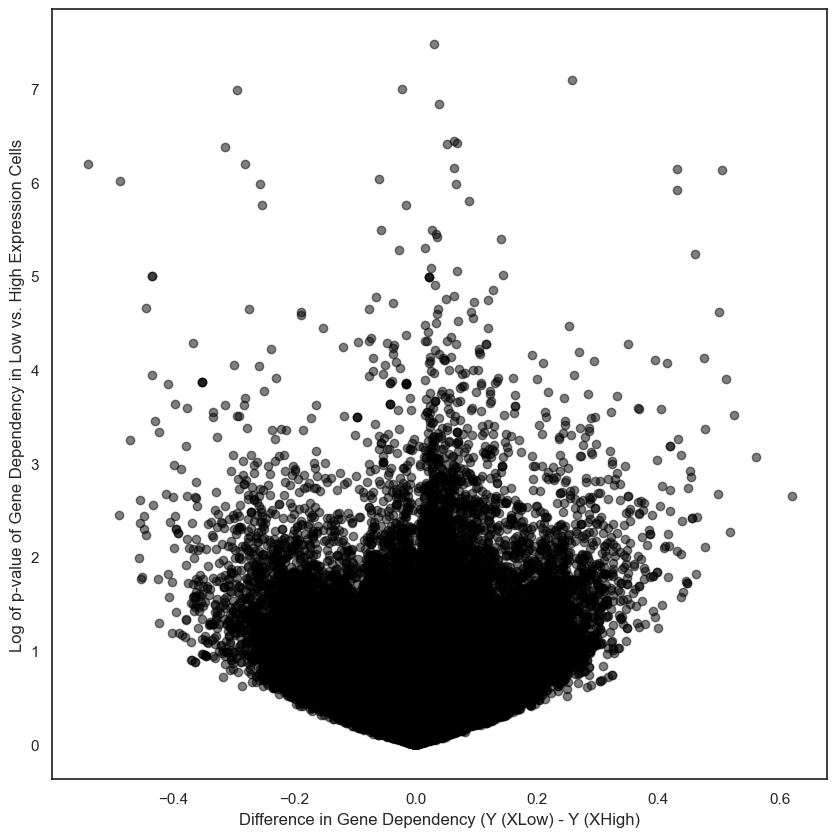

In [563]:
plt.figure(figsize=(10,10))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], alpha=0.5, color='black')

# Axis Labels
plt.xlabel('Difference in Gene Dependency (Y (XLow) - Y (XHigh)')
plt.ylabel('Log of p-value of Gene Dependency in Low vs. High Expression Cells')

In [564]:
BONFERONNI_PVALUE = 0.05 / (gene_effect_matrix_df.shape[0] * gene_effect_matrix_df.shape[1])
MANUAL = 3
# Rows where the p-value is less than 0.05
significant_rows_df = log_gene_effect_matrix_df[log_gene_effect_matrix_df > MANUAL]

# Fill NAN with 1
#significant_rows_df.fillna(1, inplace=True)
significant_rows_df.head(5)



,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APLNR,ARID1A,ARID1B,ARID2,...,XBP1,YEATS2,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZZZ3
ACTB,NaN,5.28209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.084821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACTL6A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACTL6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKAP8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKAP8L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [565]:
# Retrieve the gene tuples where the p-value is less than 0.05
pos_significant_gene_tuples = []

for gene in significant_rows_df.columns:
    for gene2 in significant_rows_df.index:
        if (log_gene_effect_matrix_df[gene][gene2] > MANUAL) and (gene_diff_matrix_df[gene][gene2] >= .2):
            pos_significant_gene_tuples.append((gene, gene2))
        else:
            continue
print(len(pos_significant_gene_tuples))
pos_significant_gene_tuples = list(pos_significant_gene_tuples)
pos_significant_gene_tuples_df = pd.DataFrame(pos_significant_gene_tuples, columns=['Gene 1', 'Gene 2'])


58


In [566]:
neg_significant_gene_tuples = []

for gene in significant_rows_df.columns:
    for gene2 in significant_rows_df.index:
        if (log_gene_effect_matrix_df[gene][gene2] > MANUAL) and (gene_diff_matrix_df[gene][gene2] <= -.2):
            neg_significant_gene_tuples.append((gene, gene2))
        else:
            continue

neg_significant_gene_tuples = list(neg_significant_gene_tuples)
print(len(neg_significant_gene_tuples))

neg_significant_gene_tuples_df = pd.DataFrame(neg_significant_gene_tuples, columns=['Gene 1', 'Gene 2'])
neg_significant_gene_tuples_df.head(5)

 

48


,Gene 1,Gene 2
0,BAZ1B,TRERF1
1,BPTF,ACTL6A
2,BPTF,ATG7
3,BPTF,ATXN7
4,BPTF,BAP1


Text(0.5, 1.0, 'mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')

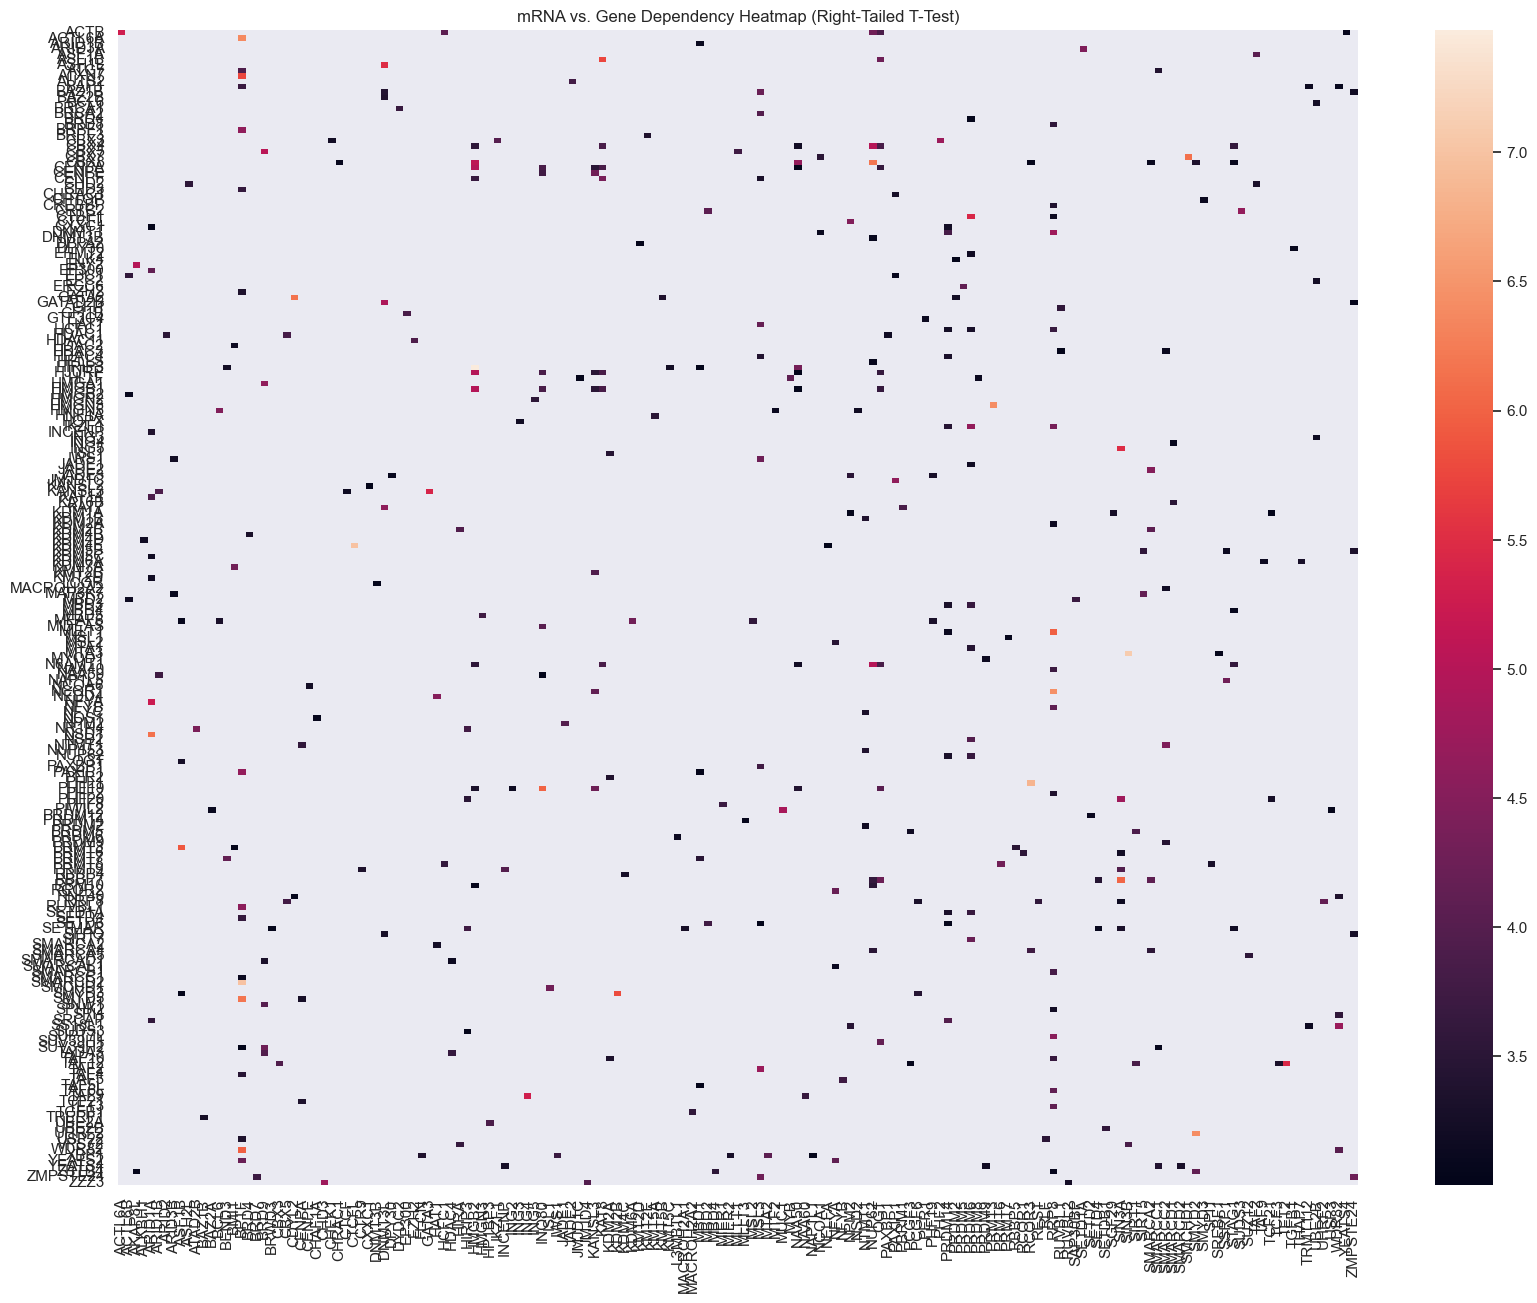

In [567]:
# Rows that were < .05
sns.set(font_scale=1)
plt.figure(figsize=(20,15))
significant_rows_df_filter = log_gene_effect_matrix_df[log_gene_effect_matrix_df > MANUAL].dropna(axis=0, how='all').dropna(axis=1, how='all')
sns.heatmap(significant_rows_df_filter, cmap='rocket', xticklabels=True, yticklabels=True, cbar=True)

plt.title('mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')


In [568]:
len(significant_rows_df_filter[significant_rows_df_filter != 1].notnull().sum(axis=1).sort_values(ascending=False))

214

##### Figures Factory

In [569]:
sns.set_style('white')

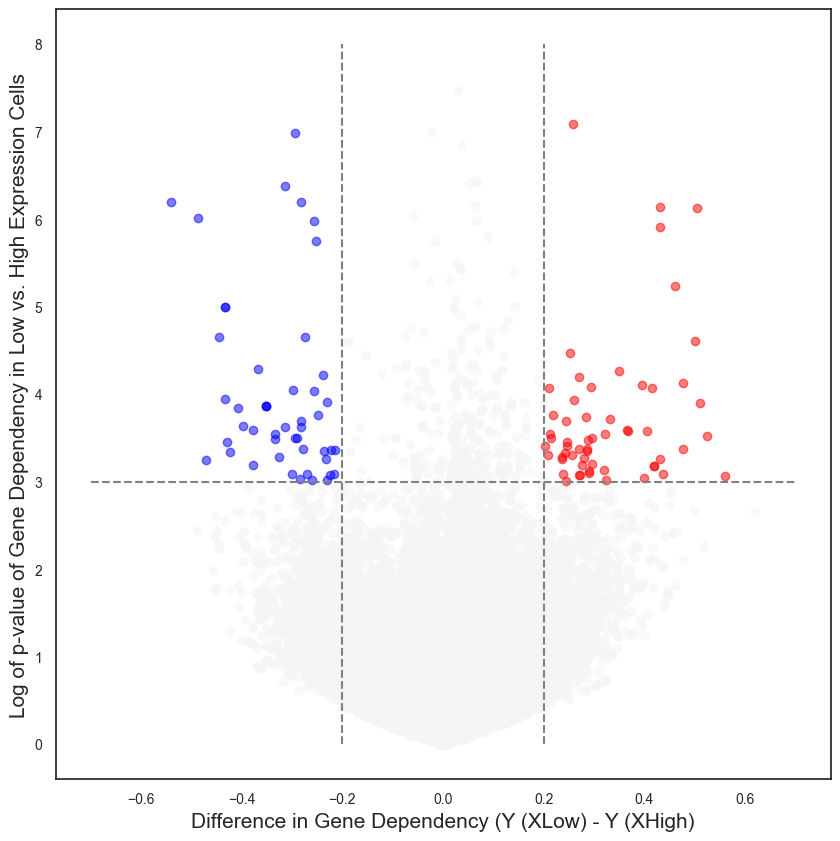

In [570]:
plt.figure(figsize=(10,10))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], alpha=0.5, color='whitesmoke')

# Axis Labels
plt.xlabel('Difference in Gene Dependency (Y (XLow) - Y (XHigh)', size = 15)
plt.ylabel('Log of p-value of Gene Dependency in Low vs. High Expression Cells', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.hlines(y = 3, xmin = -.7, xmax = .7, color='grey', linestyles='dashed')
plt.vlines(x = .2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')
plt.vlines(x = -.2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')

# Color genes in pos_significant_gene_tuples_df
for i, genes in pos_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.5, color='red')
# Color genes in neg_significant_gene_tuples_df
for i, genes in neg_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.5, color='blue')
        
name = 'Volcano Plot of Significant Negative and Positive Gene Pairs'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

ZMPSTE24 ZMPSTE24


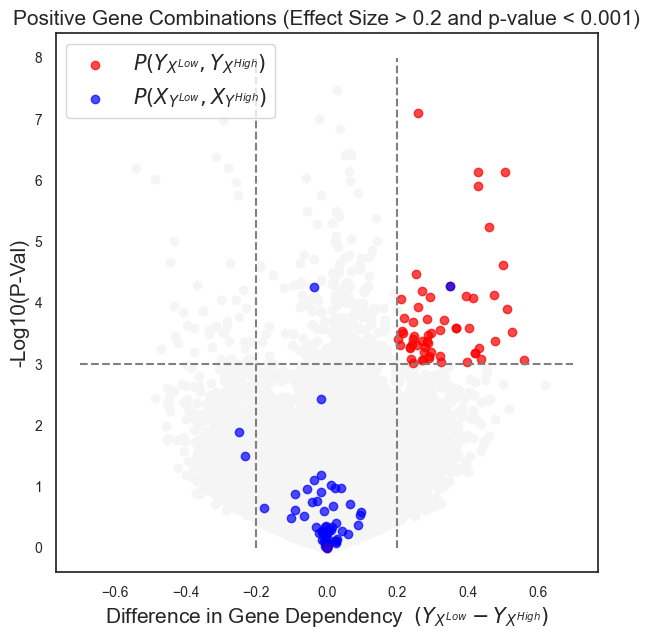

In [571]:
plt.figure(figsize=(7,7))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], color='whitesmoke')

# Axis Labels
plt.title('Positive Gene Combinations (Effect Size > 0.2 and p-value < 0.001)', size = 15)
plt.xlabel(r'Difference in Gene Dependency  $(Y_{X^{Low}} - Y_{X^{High}})$', size = 15)
plt.ylabel('-Log10(P-Val)', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.hlines(y = 3, xmin = -.7, xmax = .7, color='grey', linestyles='dashed')
plt.vlines(x = .2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')
plt.vlines(x = -.2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')

# Color genes in pos_significant_gene_tuples_df
for i, genes in pos_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.7, color='red')
# Color genes in neg_significant_gene_tuples_df
for i, genes in pos_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[1]][genes[0]], log_gene_effect_matrix_df[genes[1]][genes[0]], alpha=0.7, color='blue')
        # check if the swapped gene pair is significant
        if (genes[1], genes[0]) in pos_significant_gene_tuples:
                print(genes[1], genes[0])
        
        

# Red and Blue in legend
plt.scatter(0,0, alpha=0.7, color='red', label=r'$P(Y_{X^{Low}}, Y_{X^{High}})$')
plt.scatter(0,0, alpha=0.7, color='blue', label=r'$P(X_{Y^{Low}}, X_{Y^{High}})$')
plt.legend(loc='upper left', fontsize=15)

name = 'positive significant gene combinations swapped'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

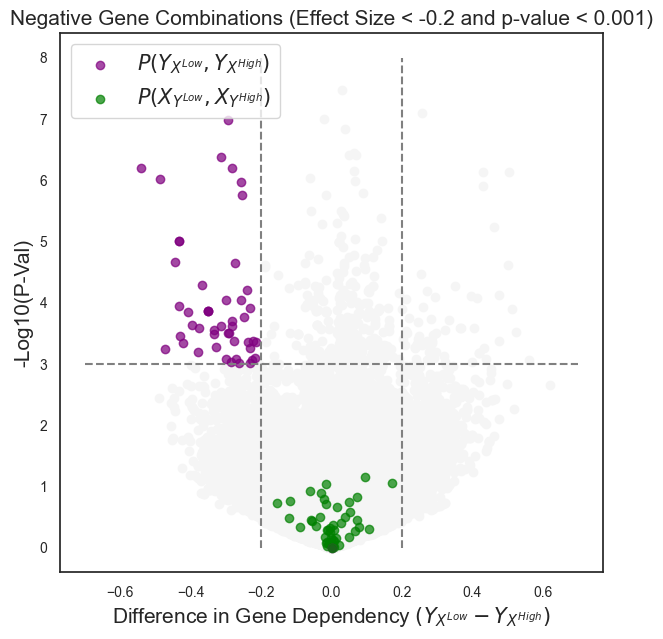

In [572]:
plt.figure(figsize=(7,7))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], color='whitesmoke')

# Axis Labels
plt.title('Negative Gene Combinations (Effect Size < -0.2 and p-value < 0.001)', size=15)
plt.xlabel(r'Difference in Gene Dependency $(Y_{X^{Low}} - Y_{X^{High}})$', size = 15)
plt.ylabel('-Log10(P-Val)', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.hlines(y = 3, xmin = -.7, xmax = .7, color='grey', linestyles='dashed')
plt.vlines(x = .2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')
plt.vlines(x = -.2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')



# Color genes in pos_significant_gene_tuples_df
for i, genes in neg_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[1]][genes[0]], log_gene_effect_matrix_df[genes[1]][genes[0]], alpha=0.7, color='green')
# Color genes in neg_significant_gene_tuples_df
for i, genes in neg_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.7, color='purple')
# Red and Blue in legend
plt.scatter(0,0, alpha=0.7, color='purple', label=r'$P(Y_{X^{Low}}, Y_{X^{High}})$')
plt.scatter(0,0, alpha=0.7, color='green', label=r'$P(X_{Y^{Low}}, X_{Y^{High}})$')
plt.legend(loc='upper left', fontsize=15)

name = 'negative significant gene combinations swapped'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')
 


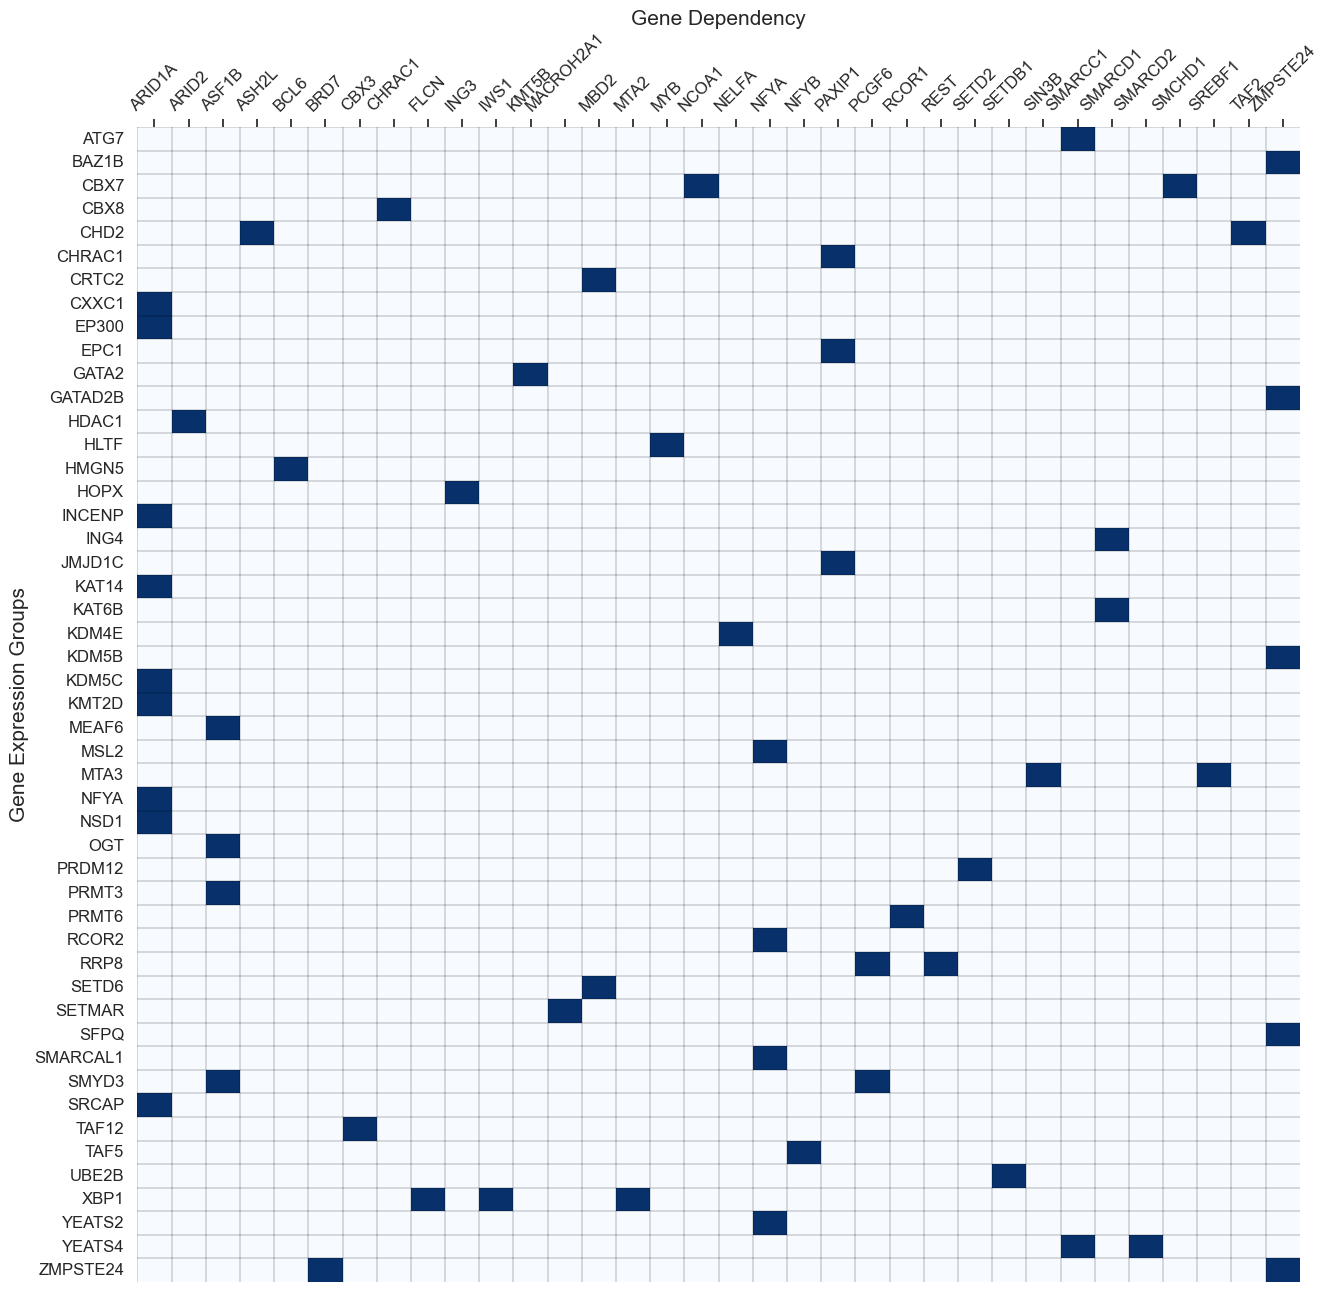

In [573]:
pos_y = pos_significant_gene_tuples_df['Gene 1'].value_counts().index
pos_x = pos_significant_gene_tuples_df['Gene 2'].value_counts().index

pos_heatmap_df = pd.DataFrame(index=pos_x, columns=pos_y)

pos_heatmap_df.sort_index(inplace=True)
pos_heatmap_df.sort_index(axis=1, inplace=True)

for i, genes in pos_significant_gene_tuples_df.iterrows():
    pos_heatmap_df.loc[genes[1]][genes[0]] = 1
pos_heatmap_df.fillna(0, inplace=True)

plt.figure(figsize=(15,15))

ax = sns.heatmap(pos_heatmap_df, cmap='Blues', cbar=False)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# draw lines
for i in range(len(pos_heatmap_df)):
    ax.axhline(i, color='black', lw=.2)

for i in range(len(pos_heatmap_df.columns)):
    ax.axvline(i, color='black', lw=.2)
    
# plt.title('Significant Gene Combinations (Effect Size > 0.2 and p-value < 0.001)')
plt.ylabel('Gene Expression Groups', size = 15)
plt.xlabel('Gene Dependency', size = 15)
plt.xticks(size=12, rotation = 45)
plt.yticks(size=12)

# move xlabel to the top
ax.xaxis.set_label_position('top')

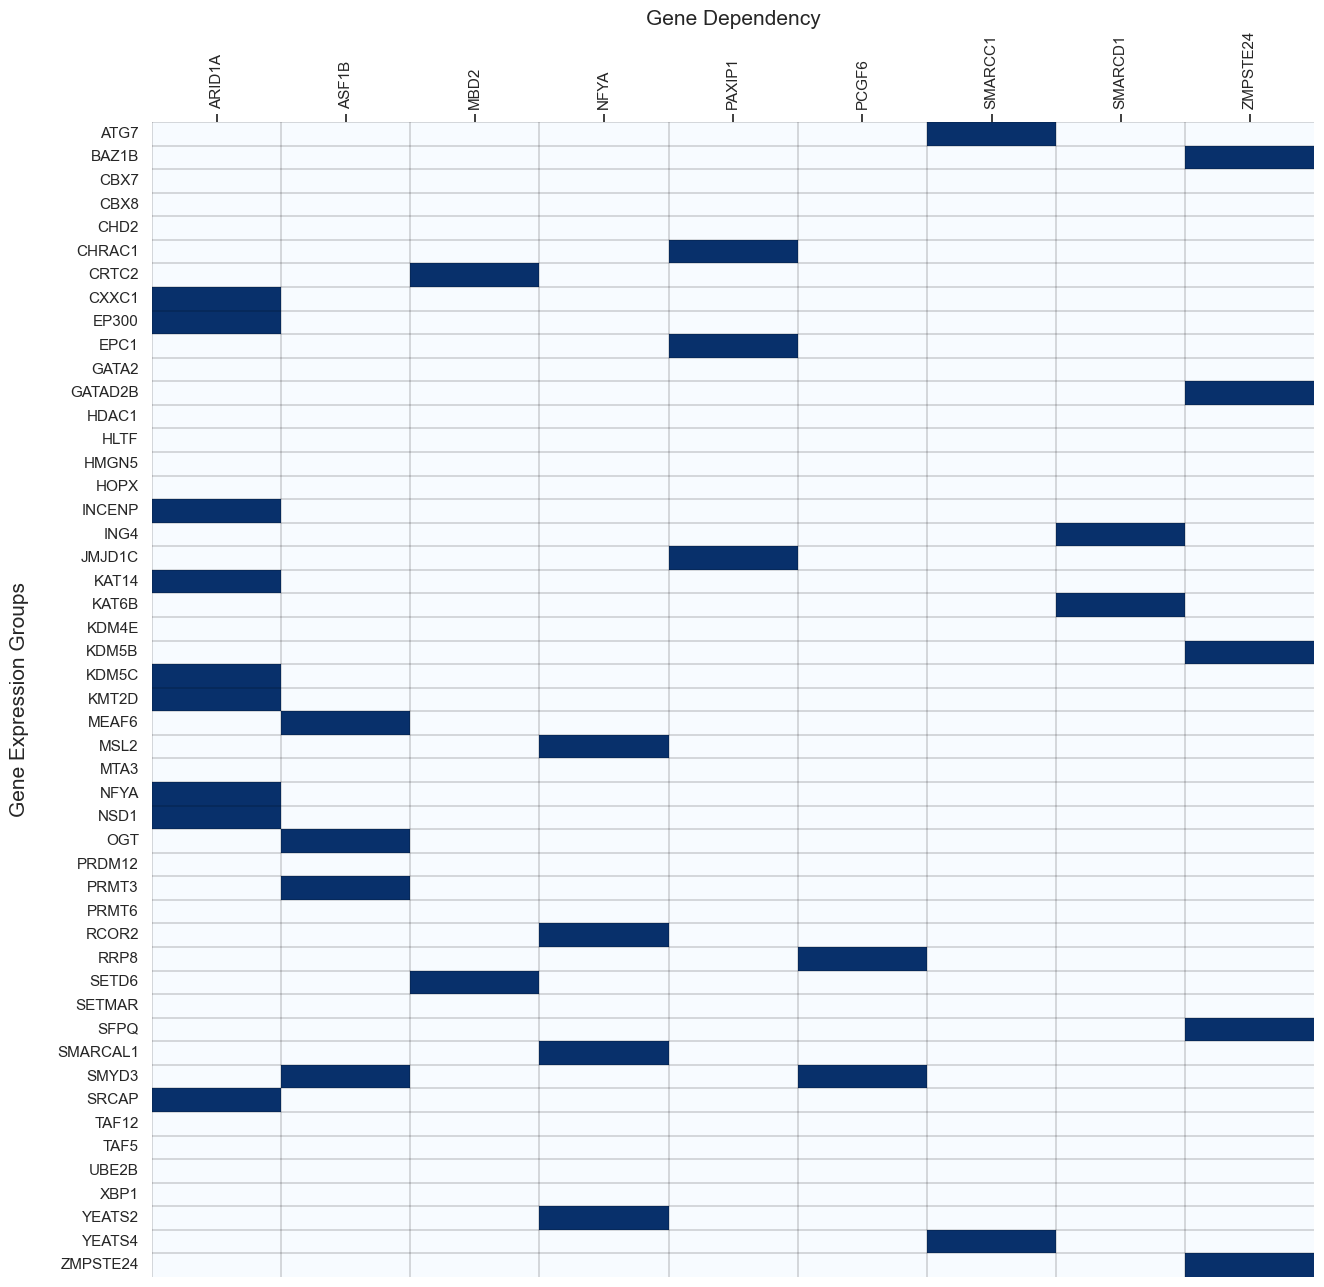

In [574]:
pos_y = pos_significant_gene_tuples_df['Gene 1'].value_counts().index
pos_x = pos_significant_gene_tuples_df['Gene 2'].value_counts().index

pos_heatmap_df = pd.DataFrame(index=pos_x, columns=pos_y)

pos_heatmap_df.sort_index(inplace=True)
pos_heatmap_df.sort_index(axis=1, inplace=True)

for i, genes in pos_significant_gene_tuples_df.iterrows():
    pos_heatmap_df.loc[genes[1]][genes[0]] = 1
pos_heatmap_df.fillna(0, inplace=True)

# index rows by pos_heatmap_df.sum(axis=1) > 1.index
dependency_filter = pos_heatmap_df.sum(axis=0) > 1
dependency_index = list(dependency_filter[dependency_filter == True].index)

#experssion_filter = pos_heatmap_df.sum(axis=1) > 1
#experssion_index = list(experssion_filter[experssion_filter == True].index)

pos_heatmap_df_filter = pos_heatmap_df[dependency_index]
#pos_heatmap_df_filter = pos_heatmap_df_filter.loc[experssion_index]

plt.figure(figsize=(15,15))

ax = sns.heatmap(pos_heatmap_df_filter, cmap='Blues', cbar=False)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# draw lines
for i in range(len(pos_heatmap_df_filter)):
    ax.axhline(i, color='black', lw=.2)

for i in range(len(pos_heatmap_df_filter.columns)):
    ax.axvline(i, color='black', lw=.2)
    
#plt.title('Significant Gene Combinations (Effect Size > 0.2 and p-value < 0.001)')
plt.ylabel('Gene Expression Groups', size = 15, labelpad=20)
plt.xlabel('Gene Dependency', size = 15)

# move xlabel to the top
ax.xaxis.set_label_position('top')

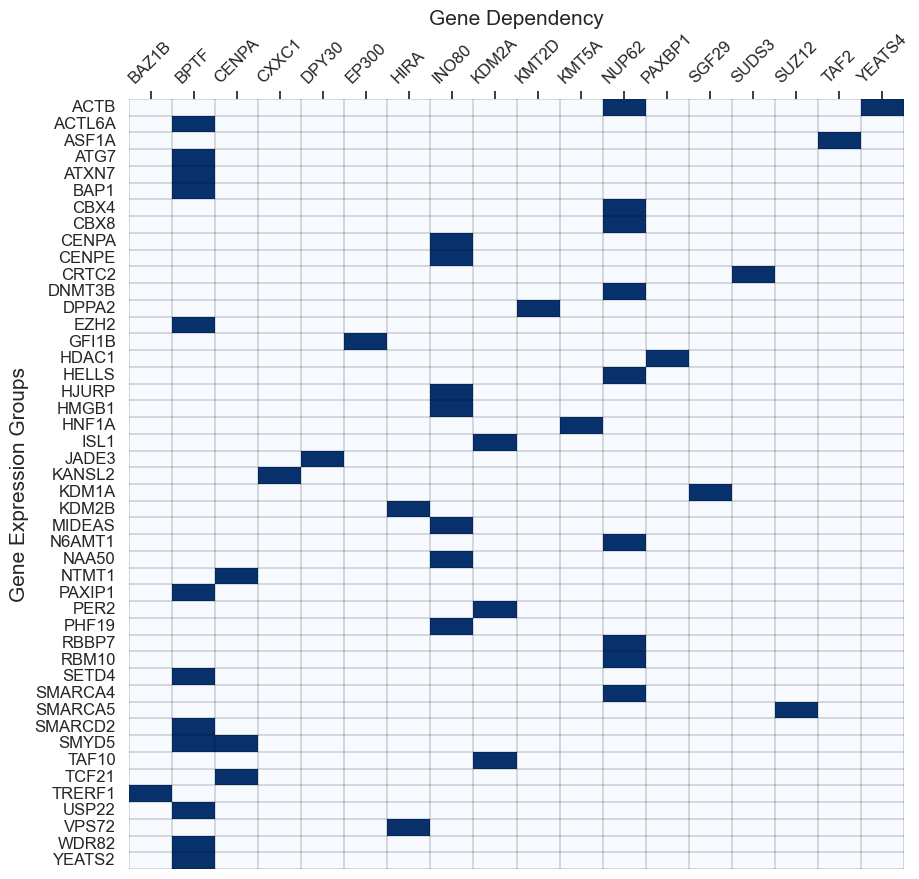

In [575]:
neg_y = neg_significant_gene_tuples_df['Gene 1'].value_counts().index
neg_x = neg_significant_gene_tuples_df['Gene 2'].value_counts().index

neg_heatmap_df = pd.DataFrame(index=neg_x, columns=neg_y)

for i, genes in neg_significant_gene_tuples_df.iterrows():
    neg_heatmap_df.loc[genes[1]][genes[0]] = 1
    
neg_heatmap_df.sort_index(inplace=True)
neg_heatmap_df.sort_index(axis=1, inplace=True)


plt.figure(figsize=(10,10))
    
neg_heatmap_df.fillna(0, inplace=True)
ax = sns.heatmap(neg_heatmap_df, cmap='Blues', cbar=False)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# draw lines
for i in range(len(pos_heatmap_df)):
    ax.axhline(i, color='black', lw=.2)

for i in range(len(pos_heatmap_df.columns)):
    ax.axvline(i, color='black', lw=.2)
    
# plt.title('Significant Gene Combinations (Effect Size < -0.2 and p-value < 0.001)')
plt.ylabel('Gene Expression Groups', size = 15)
plt.xlabel('Gene Dependency', size = 15)
plt.xticks(size=12, rotation=45)
plt.yticks(size=12)
# move xlabel to the top
ax.xaxis.set_label_position('top')

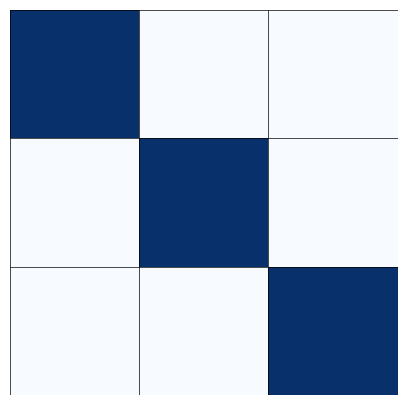

In [576]:
# 3x3 Heatmap
dummy_df = pd.DataFrame(index=['Gene A', 'Gene B', 'Gene C'], columns=['Gene A', 'Gene B', 'Gene C'])
dummy_df.fillna(0, inplace=True)
dummy_df.loc['Gene A']['Gene A'] = 1
dummy_df.loc['Gene B']['Gene B'] = 1
dummy_df.loc['Gene C']['Gene C'] = 1


plt.figure(figsize=(5,5))
ax = sns.heatmap(dummy_df, cmap='Blues', cbar=False)

# remove yticks
ax.set(yticks=[])
ax.set(xticks=[])

# draw lines
for i in range(len(dummy_df)):
    ax.axhline(i, color='black', lw=.5)

for i in range(len(dummy_df.columns)):
    ax.axvline(i, color='black', lw=.5)
    
# transparent save
plt.savefig('heatmap.png', transparent=True)
    



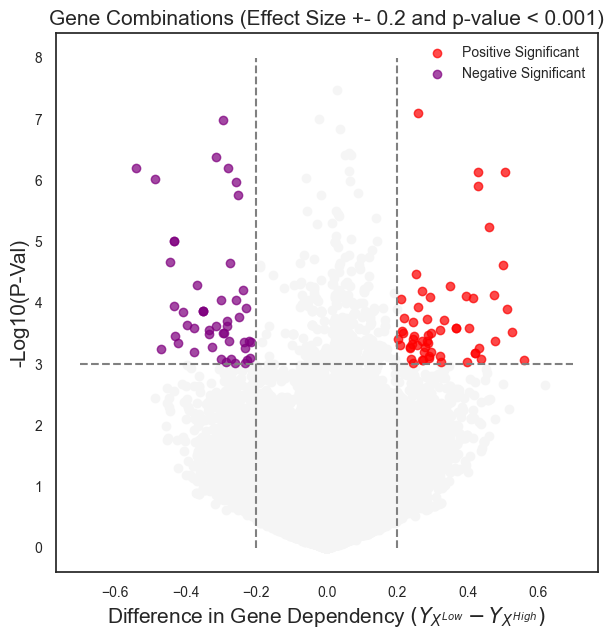

In [577]:
plt.figure(figsize=(7,7))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], color='whitesmoke')

# Color genes in pos_significant_gene_tuples_df
for i, genes in pos_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.7, color='red')
    
# Color genes in neg_significant_gene_tuples_df
for i, genes in neg_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.7, color='purple')

# Axis Labels
plt.title('Gene Combinations (Effect Size +- 0.2 and p-value < 0.001)', size = 15)
plt.xlabel(r'Difference in Gene Dependency $(Y_{X^{Low}} - Y_{X^{High}})$', size = 15)
plt.ylabel('-Log10(P-Val)', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.hlines(y = 3, xmin = -.7, xmax = .7, color='grey', linestyles='dashed')
plt.vlines(x = .2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')
plt.vlines(x = -.2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')

# Red and Purple Circles Legend
red_circle = plt.scatter([],[], c='red', alpha=0.7, label='Positive Significant')
purple_circle = plt.scatter([],[], c='purple', alpha=0.7, label='Negative Significant')
plt.legend([red_circle,purple_circle],['Positive Significant', 'Negative Significant'], loc='upper right', fontsize=10, frameon=False)
name = 'positive and negative significant gene combinations'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


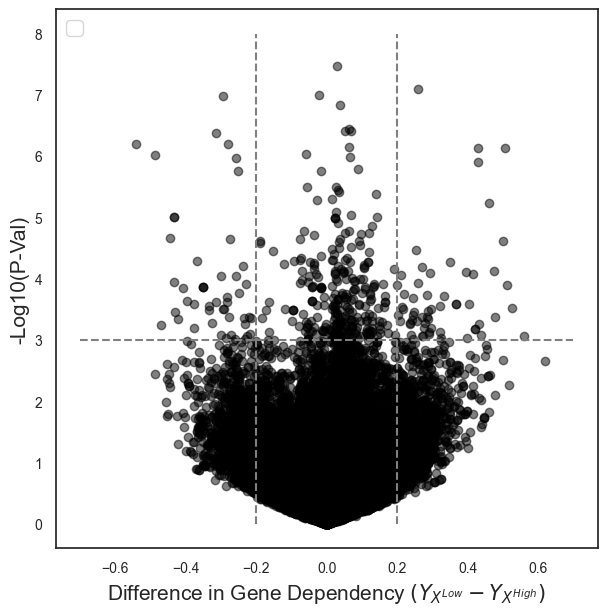

In [578]:
plt.figure(figsize=(7,7))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], alpha=0.5, color='black')

# Axis Labels
#plt.title('Gene Combinations (Effect Size +- 0.2 and p-value < 0.001)', size=15)
plt.xlabel(r'Difference in Gene Dependency $(Y_{X^{Low}} - Y_{X^{High}})$', size = 15)
plt.ylabel('-Log10(P-Val)', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.hlines(y = 3, xmin = -.7, xmax = .7, color='grey', linestyles='dashed')
plt.vlines(x = .2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')
plt.vlines(x = -.2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')

plt.legend(loc='upper left', fontsize=15)

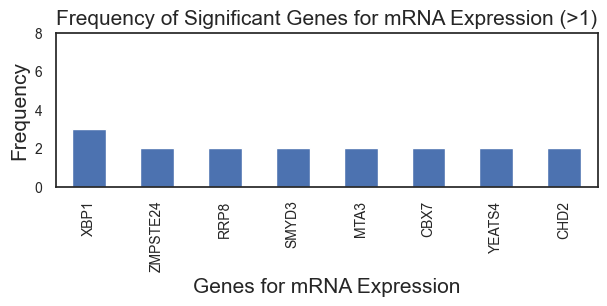

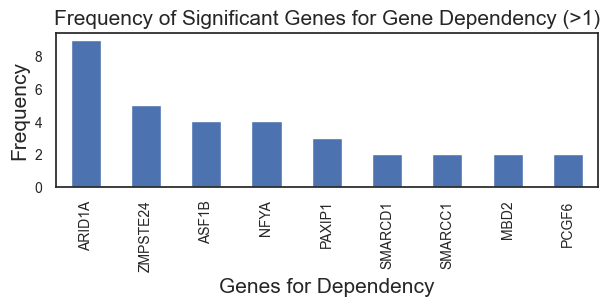

In [579]:
# Boolean array if it contains any value
plt.figure(figsize=(7,2))
pos_heatmap_df_bool = pos_heatmap_df.astype(bool)
# drop if sum is less than 1
pos_heatmap_expression_sum = pos_heatmap_df_bool.sum(axis=1).sort_values(ascending=False)

try:
    pos_heatmap_expression_sum[pos_heatmap_expression_sum > 1].plot(kind='bar')
except:
    print('No significant genes for mRNA expression')
    

plt.title('Frequency of Significant Genes for mRNA Expression (>1)', size = 15)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Genes for mRNA Expression', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.ylim(0,8)

name = 'frequency of significant genes for mRNA expression'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(7,2))
pos_heatmap_dependency_sum = pos_heatmap_df_bool.sum(axis=0).sort_values(ascending=False)

try:
    pos_heatmap_dependency_sum[pos_heatmap_dependency_sum > 1].plot(kind='bar')
except:
    print('No significant genes for gene dependency')

plt.title('Frequency of Significant Genes for Gene Dependency (>1)', size = 15)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Genes for Dependency', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

name = 'frequency of significant genes for gene dependency'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

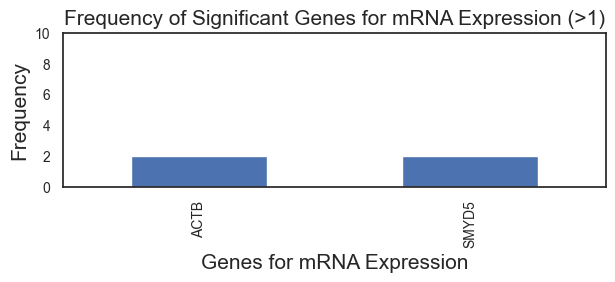

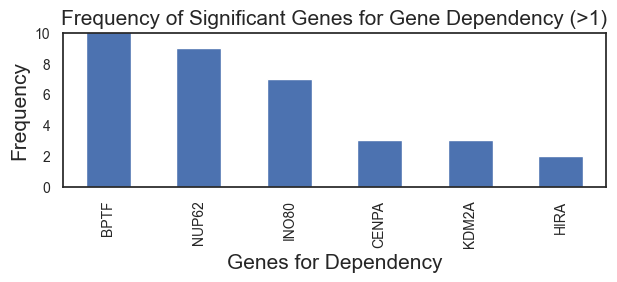

In [580]:
# Boolean array if it contains any value
plt.figure(figsize=(7,2))
neg_heatmap_df_bool = neg_heatmap_df.astype(bool)
# drop if sum is less than 1
neg_heatmap_expression_sum = neg_heatmap_df_bool.sum(axis=1).sort_values(ascending=False)
try:
    neg_heatmap_expression_sum[neg_heatmap_expression_sum > 1].plot(kind='bar')
except:
    print('No significant genes for mRNA expression'
          )
plt.title('Frequency of Significant Genes for mRNA Expression (>1)', size = 15)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Genes for mRNA Expression', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.ylim(0,10)

name = 'negative frequency of significant genes for mRNA expression'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(7,2))
neg_heatmap_dependency_sum = neg_heatmap_df_bool.sum(axis=0).sort_values(ascending=False)

try:
    neg_heatmap_dependency_sum[neg_heatmap_dependency_sum > 1].plot(kind='bar')
except:
    print('No significant genes for gene dependency')

plt.title('Frequency of Significant Genes for Gene Dependency (>1)', size = 15)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Genes for Dependency', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.ylim(0,10)

name = 'negative frequency of significant genes for gene dependency'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

Text(0.05, 0.5, 'KO Dependency of Gene B')

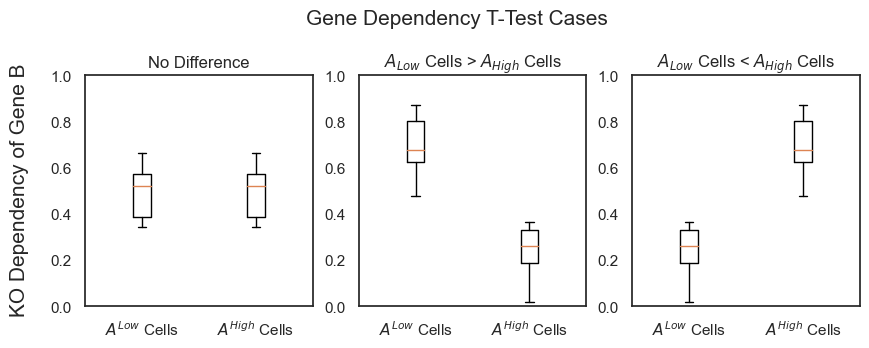

In [581]:
fig, ax = plt.subplots(1,3, figsize=(10,3))

no_diff = np.full(shape=10, fill_value=.5)
diff = np.full(shape=10, fill_value=.75)
neg_diff = np.full(shape=10, fill_value=.25)

# generate array from probability
no_diff = np.random.normal(loc=.5, scale=.1, size=10)
diff = np.random.normal(loc=.75, scale=.1, size=10)
neg_diff = np.random.normal(loc=.25, scale=.1, size=10)

# boxplots
ax[0].boxplot([no_diff, no_diff])
ax[1].boxplot([diff, neg_diff])
ax[2].boxplot([neg_diff, diff])

# set axis to 0 - 1
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])
ax[2].set_ylim([0,1])

# x ticks
ax[0].set_xticklabels([r'$A^{Low}$ Cells', r'$A^{High}$ Cells'])
ax[1].set_xticklabels([r'$A^{Low}$ Cells', r'$A^{High}$ Cells'])
ax[2].set_xticklabels([r'$A^{Low}$ Cells', r'$A^{High}$ Cells'])

# titles
ax[0].set_title('No Difference')
ax[1].set_title(r'$A_{Low}$ Cells > $A_{High}$ Cells')
ax[2].set_title(r'$A_{Low}$ Cells < $A_{High}$ Cells')

# super titles
fig.suptitle('Gene Dependency T-Test Cases ', size=15, y=1.1)

# super axis labels
#fig.text(0.5, 0.01, 'Gene Expression Groups of A', ha='center', size=15)
# yaxis 
fig.text(0.05, 0.5, 'KO Dependency of Gene B', va='center', rotation='vertical', size=15)



(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0')])

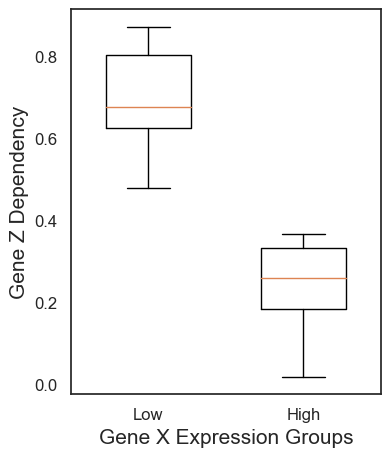

In [582]:
plt.figure(figsize=(4,5))
plt.boxplot([diff, neg_diff], widths=.55)
plt.xlabel('Gene X Expression Groups', size = 15)
plt.xticks([1,2], ['Low', 'High'], size=12)
plt.ylabel('Gene Z Dependency', size = 15)
plt.yticks(size=12)

In [583]:
for gene in intersection:
    if full_mRNA_df[gene].median() - mRNA_df[gene].median() > 1:
        print(gene, 'is higher in full mRNA')

JDP2 is higher in full mRNA
TRERF1 is higher in full mRNA
AUTS2 is higher in full mRNA
MACROH2A2 is higher in full mRNA
MUC1 is higher in full mRNA


<AxesSubplot: >

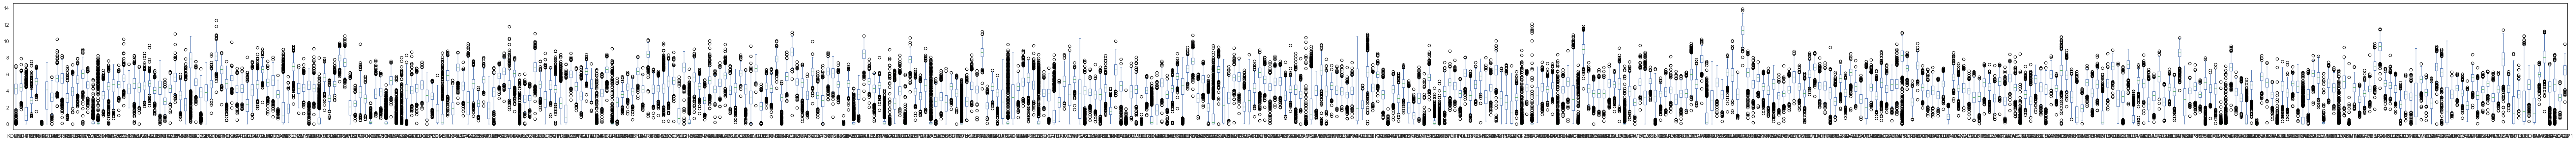

In [584]:
full_mRNA_df[intersection].plot(kind='box', figsize=(100,5))

In [585]:
full_chromatin_genes_quantiles['ARID1A']

0.200    4.032453
0.201    4.035463
Name: ARID1A, dtype: float64

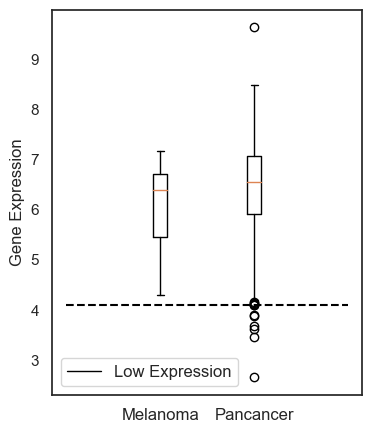

In [586]:
plt.figure(figsize=(4,5))
plt.boxplot([mRNA_df[gene], full_mRNA_df[gene]])

plt.xticks([1,2], ['Melanoma', 'Pancancer'], size=12)
plt.ylabel('Gene Expression', size = 12)

plt.hlines(4.1, 0, 3, color='black', linestyle='--')
plt.legend(['Low Expression'], loc='lower left', fontsize=12, frameon=True)


(array([  1.,   0.,   3.,   2.,  12.,  29.,  47.,  98., 114., 152., 210.,
        234., 234., 162.,  79.,  24.,   5.,   0.,   0.,   1.]),
 array([2.65306002, 3.00244367, 3.35182731, 3.70121096, 4.05059461,
        4.39997826, 4.74936191, 5.09874556, 5.4481292 , 5.79751285,
        6.1468965 , 6.49628015, 6.8456638 , 7.19504745, 7.54443109,
        7.89381474, 8.24319839, 8.59258204, 8.94196569, 9.29134934,
        9.64073298]),
 <BarContainer object of 20 artists>)

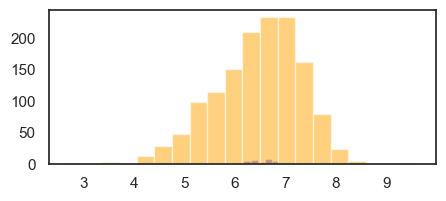

In [587]:
# same figure as above but with distributions

plt.figure(figsize=(5,2))

plt.hist(mRNA_df[gene], bins=20, alpha=.5, color='blue')
plt.hist(full_mRNA_df[gene], bins=20, alpha=.5, color='orange')


C:\Users\commo\AppData\Local\Temp\ipykernel_12636\278582836.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(full_mRNA_df[gene], alpha=.5, color='orange', shade=True)
C:\Users\commo\AppData\Local\Temp\ipykernel_12636\278582836.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mRNA_df[gene], alpha=.5, color='blue', shade=True)


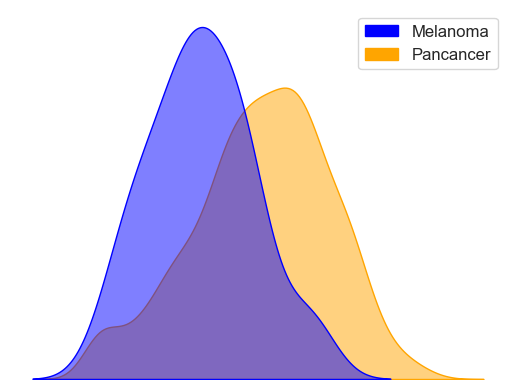

In [588]:
gene = 'JDP2'
sns.kdeplot(full_mRNA_df[gene], alpha=.5, color='orange', shade=True)
sns.kdeplot(mRNA_df[gene], alpha=.5, color='blue', shade=True)

plt.yticks([])
plt.ylabel('')
plt.xticks([])
plt.xlabel('')
# mpatches
import matplotlib.patches as mpatches

# blue and orange patches
blue_patch = mpatches.Patch(color='blue', label='Melanoma')
orange_patch = mpatches.Patch(color='orange', label='Pancancer')

# legend
plt.legend(handles=[blue_patch, orange_patch], loc='upper right', fontsize=12)

# remove plot frame
sns.despine(left=True, bottom=True)

# save as transparent
plt.savefig('gene expression distribution.png', dpi=300, bbox_inches='tight', transparent=True)

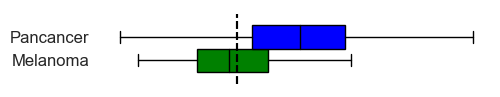

In [589]:
plt.figure(figsize=(5,1))
# green fill
plt.boxplot(mRNA_df[gene], positions=[1], vert = False, widths=1, patch_artist=True, boxprops=dict(facecolor="green"), medianprops=dict(color="black"))
plt.boxplot(full_mRNA_df[gene], positions=[2], vert = False, widths=1, patch_artist=True, boxprops=dict(facecolor="blue"), medianprops=dict(color="black"))

# strip frame 
sns.despine(left=True, bottom=True)

# yticks
plt.yticks([1,2], ['Melanoma', 'Pancancer'], size=12)
# xticks
plt.xticks([])

# vline at 25th percentile
plt.vlines(full_chromatin_genes_quantiles[gene], 0, 3, color='black', linestyle='--')

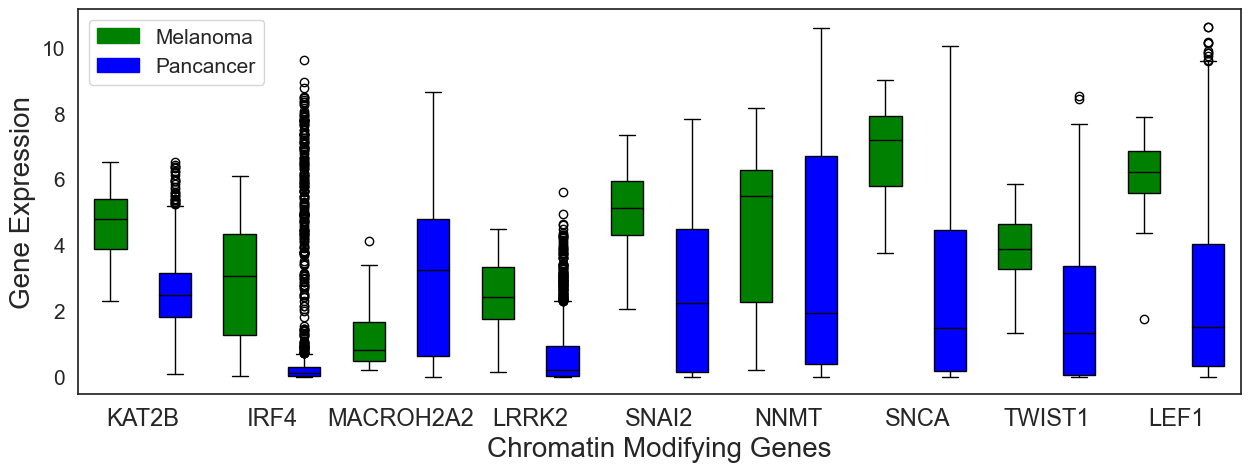

In [590]:
plt.figure(figsize=(15,5))
count = 0
xticks = []
for gene in intersection:
    if (mRNA_df[gene].median() - full_mRNA_df[gene].median() > 2.1) | (full_mRNA_df[gene].median() - mRNA_df[gene].median() > 2.1):
        plt.boxplot(mRNA_df[gene], positions=[count], vert = True, widths=.5, patch_artist=True, boxprops=dict(facecolor="green"), medianprops=dict(color="black"))
        plt.boxplot(full_mRNA_df[gene], positions=[count+1], vert = True, widths=.5, patch_artist=True, boxprops=dict(facecolor="blue"), medianprops=dict(color="black"))
        count += 2
        xticks.append(gene)
        
plt.xticks(np.arange(0, len(xticks)*2, 2)+.5, xticks, size=17)
plt.yticks(size=15)
plt.ylabel('Gene Expression', size=20)
plt.xlabel('Chromatin Modifying Genes', size=20)

green_patch = mpatches.Patch(color='green', label='Melanoma')
blue_patch = mpatches.Patch(color='blue', label='Pancancer')
plt.legend(handles=[green_patch, blue_patch], loc='upper left', fontsize=15)

In [591]:
full_chromatin_genes_quantiles[gene]

0.200    5.731455
0.201    5.735659
Name: CTBP1, dtype: float64

##### Left-Sided T-Test

In [592]:
 # Create a Matrix of Gene x Gene
gene_effect_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1])) 
print(gene_effect_matrix.shape)

# Iterate through the genes
# For each gene, grab the low and high expression cell lines from the gene_groups dataframe
# Iterate through the other expression cell lines and then grab the gene dependency values
# from depdenency_df, index by the index of the cell line
for gene in vip_genes:
    low_expression = gene_groups[gene_groups[gene] == 'low'].index
    high_expression = gene_groups[gene_groups[gene] == 'high'].index
    
    for gene2 in vip_genes:
        low_expression_dependency = dependency_df.loc[low_expression, gene2]
        high_expression_dependency = dependency_df.loc[high_expression, gene2]
        
        # T-Test of Gene Dependency in Low and High Expression Cells
        ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'less')
        
        # Add the t-statistic to the gene effect matrix
        gene_effect_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[1]
        
# Save
np.savetxt(save_path + 'mRNA vs. Gene Dependency Matrix.csv', gene_effect_matrix, delimiter=",")

(421, 421)


C:\Users\commo\AppData\Local\Temp\ipykernel_12636\1436156346.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'less')


In [593]:
# Convert to PD
gene_effect_matrix_df = pd.DataFrame(gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Remove NaN rows
gene_effect_matrix_plot = gene_effect_matrix[np.isnan(gene_effect_matrix).any(axis=1)]

In [594]:
BONFERONNI_PVALUE = 0.05 / (gene_effect_matrix_plot.shape[0] * gene_effect_matrix_plot.shape[1])
# Rows where the p-value is less than 0.05
significant_rows_df = gene_effect_matrix_df[gene_effect_matrix_df < BONFERONNI_PVALUE]
# Fill NAN with 1
significant_rows_df.fillna(1, inplace=True)
significant_rows_df.head(5)



,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APLNR,ARID1A,ARID1B,ARID2,...,XBP1,YEATS2,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZZZ3
ACTB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8L,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'mRNA vs. Gene Dependency Heatmap (Left-Tailed T-Test)')

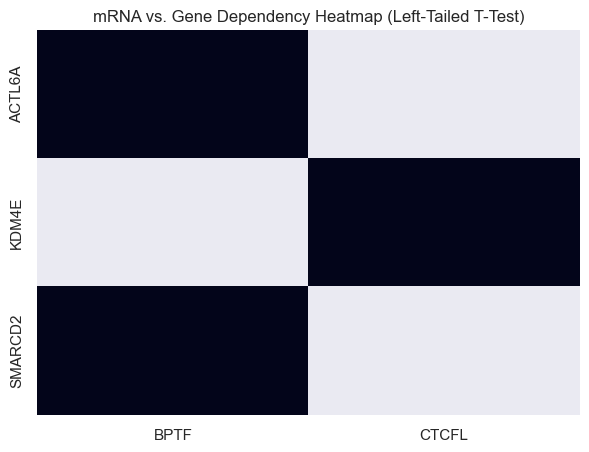

In [595]:
# Rows that were < .05
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
sns.heatmap(significant_rows_df[significant_rows_df < BONFERONNI_PVALUE].dropna(axis=0, how='all').dropna(axis=1, how='all'), vmin=0, vmax=0.05, cmap='rocket', xticklabels=True, yticklabels=True, cbar=False)
plt.title('mRNA vs. Gene Dependency Heatmap (Left-Tailed T-Test)')


Text(0.5, 0, 'ZMPSTE24 mRNA Expression')

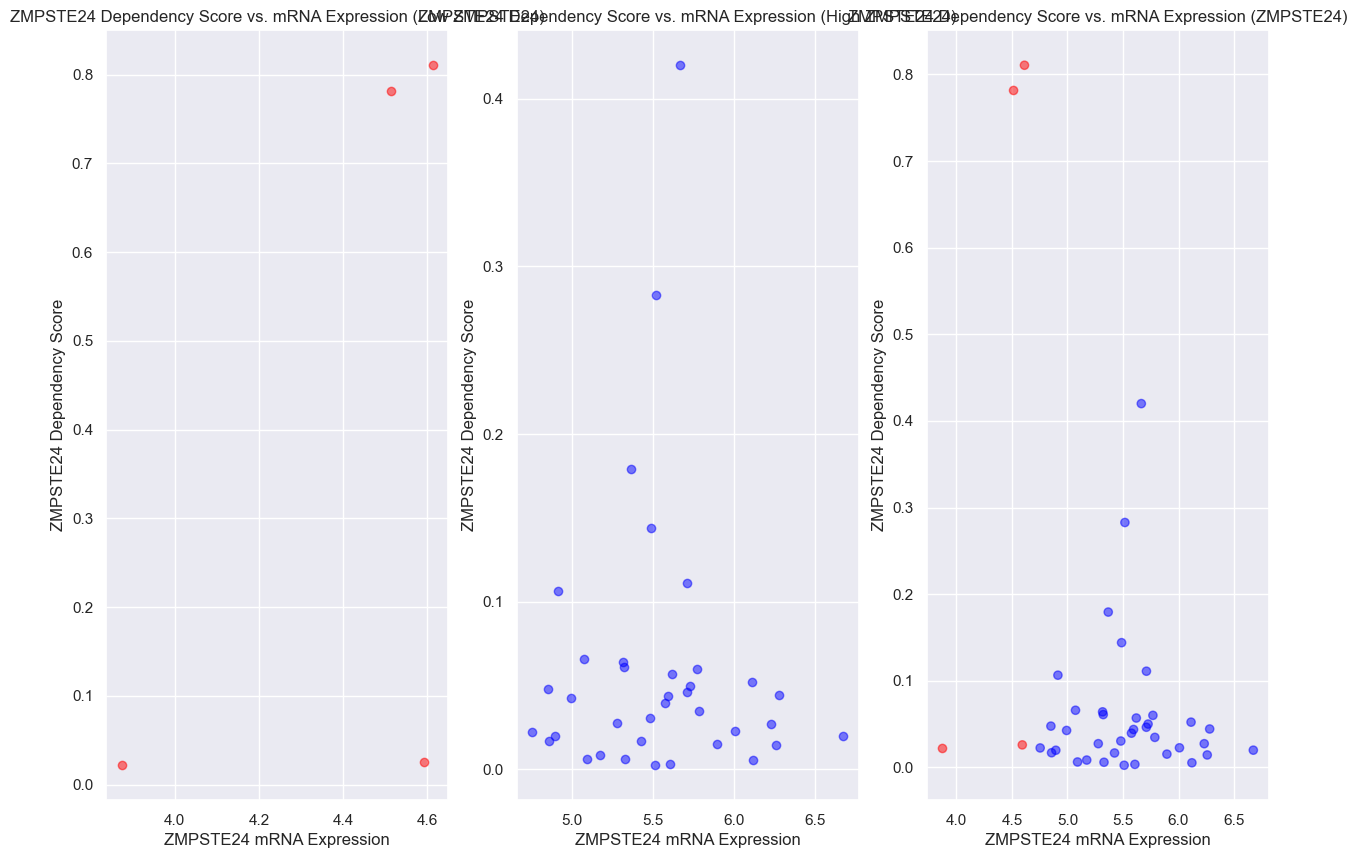

In [596]:
# Manual Validation
gene = 'ZMPSTE24'
gene2 = 'ZMPSTE24'
g1_expression = gene_groups[gene].index
g1_low_expression = gene_groups[gene_groups[gene] == 'low'].index
g1_high_expression = gene_groups[gene_groups[gene] == 'high'].index

g1_mrna = mRNA_df[gene]
g1_low_mrna = mRNA_df.loc[g1_low_expression, gene]
g1_high_mrna = mRNA_df.loc[g1_high_expression, gene]

g2_dependency = dependency_df[gene2]
g2_low_dependency = dependency_df.loc[g1_low_expression, gene2]
g2_high_dependency = dependency_df.loc[g1_high_expression, gene2]


g2_low_mrna = mRNA_df.loc[g1_low_expression, gene2]
g2_high_mrna = mRNA_df.loc[g1_high_expression, gene2]

# combine g2 low mrna and g2 high mrna to a dataframe
g2_mrna = pd.concat([g2_low_mrna, g2_high_mrna], axis=0)
g2_mrna = g2_mrna.to_frame()
g2_mrna['color'] = ['red'] * g2_low_mrna.shape[0] + ['blue'] * g2_high_mrna.shape[0]
g2_mrna.sort_index(inplace=True)




fig,ax = plt.subplots(1,3,figsize=(15,10))
sns.set(font_scale=1)


ax[0].scatter(g2_low_mrna, g2_low_dependency, color='red', alpha=0.5)
ax[0].set_title(gene2 + ' Dependency Score vs. mRNA Expression (Low ' + gene + ')')
ax[0].set_ylabel(gene2 + ' Dependency Score')
ax[0].set_xlabel(gene2 + ' mRNA Expression')

ax[1].scatter(g2_high_mrna, g2_high_dependency, color='blue', alpha=0.5)
ax[1].set_title(gene2 + ' Dependency Score vs. mRNA Expression (High ' + gene + ')')
ax[1].set_ylabel(gene2 + ' Dependency Score')
ax[1].set_xlabel(gene2 + ' mRNA Expression' )

# color by label
ax[2].scatter(g2_mrna.iloc[:,0], g2_dependency, color=g2_mrna['color'], alpha=0.5)
ax[2].set_title(gene2 + ' Dependency Score vs. mRNA Expression (' + gene + ')')
ax[2].set_ylabel(gene2 + ' Dependency Score')
ax[2].set_xlabel(gene2 + ' mRNA Expression' )
 


##### Right Sided T-Test

In [597]:
 # Create a Matrix of Gene x Gene
gene_effect_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1])) 
print(gene_effect_matrix.shape)

# Iterate through the genes
# For each gene, grab the low and high expression cell lines from the gene_groups dataframe
# Iterate through the other expression cell lines and then grab the gene dependency values
# from depdenency_df, index by the index of the cell line
for gene in vip_genes:
    low_expression = gene_groups[gene_groups[gene] == 'low'].index
    high_expression = gene_groups[gene_groups[gene] == 'high'].index
    
    for gene2 in vip_genes:
        low_expression_dependency = dependency_df.loc[low_expression, gene2]
        high_expression_dependency = dependency_df.loc[high_expression, gene2]
        
        # T-Test of Gene Dependency in Low and High Expression Cells
        ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'greater')
        
        # Add the t-statistic to the gene effect matrix
        gene_effect_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[1]
        
# Save
np.savetxt(save_path + 'mRNA vs. Gene Dependency Matrix.csv', gene_effect_matrix, delimiter=",")

(421, 421)


C:\Users\commo\AppData\Local\Temp\ipykernel_12636\2010492129.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'greater')


In [598]:
# Convert to PD
gene_effect_matrix_df = pd.DataFrame(gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Remove NaN rows
gene_effect_matrix_plot = gene_effect_matrix[np.isnan(gene_effect_matrix).any(axis=1)]

In [599]:
BONFERONNI_PVALUE = 0.05 / (gene_effect_matrix_plot.shape[0] * gene_effect_matrix_plot.shape[1])
# Rows where the p-value is less than 0.05
significant_rows_df = gene_effect_matrix_df[gene_effect_matrix_df < BONFERONNI_PVALUE]
# Fill NAN with 1
significant_rows_df.fillna(1, inplace=True)
significant_rows_df.head(5)



,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APLNR,ARID1A,ARID1B,ARID2,...,XBP1,YEATS2,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZZZ3
ACTB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8L,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')

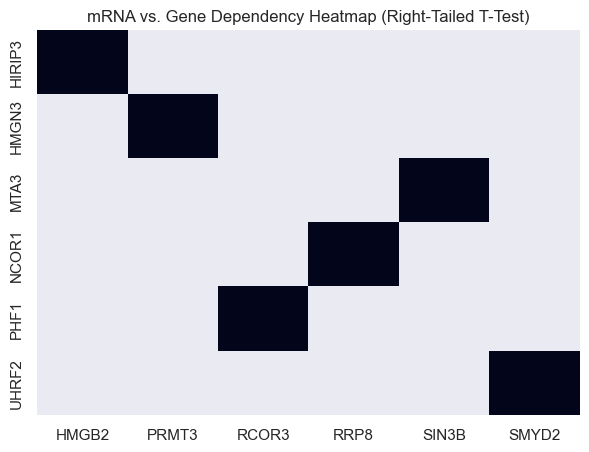

In [600]:
# Rows that were < .05
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
significant_rows_df_filter = significant_rows_df[significant_rows_df < BONFERONNI_PVALUE].dropna(axis=0, how='all').dropna(axis=1, how='all')
sns.heatmap(significant_rows_df_filter, vmin=0, vmax=0.05, cmap='rocket', xticklabels=True, yticklabels=True, cbar=False)

plt.title('mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')


Text(0.5, 0, 'ZZZ3 mRNA Expression')

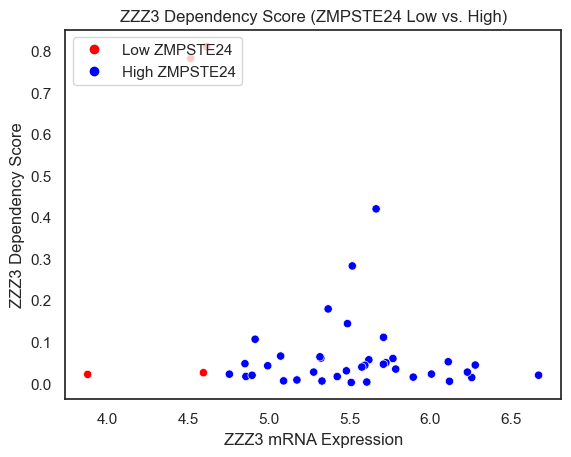

In [601]:
import matplotlib.lines as mlines
gene = 'ZMPSTE24'
# color by label
sns.set_style("white")
sns.scatterplot(x = g2_mrna.iloc[:,0], y = g2_dependency, hue=g2_mrna['color'].tolist(), palette=['blue', 'red'])
plt.title(gene2 + ' Dependency Score (' + gene + ' Low vs. High' + ')')

red_patch = mlines.Line2D([], [], color='red', marker='o', linestyle='None')
blue_patch =  mlines.Line2D([], [], color='blue', marker='o', linestyle='None')
plt.legend(loc='upper left', labels=['Low ' + gene, 'High ' + gene], handles=[red_patch, blue_patch])
plt.ylabel(gene2 + ' Dependency Score')
plt.xlabel(gene2 + ' mRNA Expression' )